#  **1.Latar Belakang**
Airbnb merupakana salah satu marketplace yang didirikan pada tahun 2008, berbasis di San Francisco, California. Airbnb digunakan untuk menawarkan penginapan terutama homestay, atau pengalaman wisata. Airbnb digunakan para wisatawan untuk bepergian dengan cara yang lebih unik dan personal. Saat ini, Airbnb menjadi salah satu layanan unik yang digunakan dan diakui oleh seluruh dunia. Analisis data terhadap jutaan listing yang disediakan melalui Airbnb merupakan faktor penting bagi perusahaan. Banyaknya listing ini menghasilkan data yang dapat dianalisis dan digunakan dalam hal keamanan, keputusan bisnis, pemahaman tentang perilaku dan kinerja pelanggan serta host di platform, sebagai inisiatif pemasaran, penerapan layanan yang inovatif, dan masih banyak lainnya.   


## A. Pernyataan Masalah
Perusahaan ingin mengetahui **karakteristik listing airbnb di bangkok**. Informasi ini akan membantu perusahaan dalam menentukan kriteria listing yang dipilih user airbnb agar listing yang dibuat host lebih tepat sasaran. 

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik listing airbnb di bangkok yang sering digunakan (populer) oleh user?**

# **2. Data**
Untuk menjawab pertanyaan di atas, kita akan menganalisa data airbnb listing kota Bangkok yang dimiliki oleh perusahaan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Airbnb Listings Bangkok.csv')
display(df.head(),df.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


Info dataset Airbnb Listings Bangkok:  

* Unnamed: 0 : index dari dataset
* id : pengenal unik Airbnb untuk tempat tersebut.
* name : Nama dari listings.
* host_id : nomor identifikasi unik Airbnb untuk tuan rumah/host.
* host_name : Nama tuan rumah/host. Biasanya, hanya nama depan.
* neighborhood : Lingkungan/wilayah tempat listing berada berdasarkan latitude dan longitude.
* Latitude : Menggunakan proyeksi World Geodetic System (WGS84) untuk koordinat lintang.
* Longitude : Menggunakan proyeksi World Geodetic System (WGS84) untuk koordinat bujur.
* room_type : Tipe kamar yang tersedia untuk listings [Seluruh rumah/apartemen |Kamar pribadi| Ruang bersama| Hotel]
* price : Harga sewa listing dalam mata uang lokal (baht)
* minimum_nights : Jumlah minimum masa sewa listing permalam (peraturan kalender mungkin berbeda).
* number_of_reviews : Jumlah ulasan yang dimiliki listing.
* last_review : Tanggal ulasan terakhir/terbaru.
* reviews_per_month : Jumlah rata-rata ulasan yang diterima perbulan berdasarkan terakhir mendapat review.
* calculated_host_listings_count : Jumlah listing yang dimiliki pemilik pada rentang saat ini dalam geografi kota/wilayah.
* available_365 : ketersediaan listing dalam 365 hari ke depan
* number_of_reviews_ltm : Jumlah ulasan yang dimiliki listing (dalam 12 bulan terakhir).

# **3. Data Understanding and Cleaning**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

## A. Menampilkan Informasi Terkait DataFrame

In [3]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [4]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854

### A.1 Menghapus kolom Unnamed: 0
Karena kolom ini berisi seperti dengan kolom index, maka kita tidak membutuhkan kolom tersebut.

In [5]:
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## B. Descriptive Statistics

In [6]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [7]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064

In [8]:
# pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
1,name,14794,"[Nice room with superb city view, Easy going l..."
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
8,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."
9,minimum_nights,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1..."


Secara umum, kita bisa melihat bahwa:
* dataset Airbnb Listings Bangkok memiliki 16 kolom dan 15.584 baris
* Terdapat beberapa kolom yang memiliki data kosong yaitu, `name`, `host_name`, `last_review`, dan `reviews per month`. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.

## C. Missing Value

In [9]:
# Missing value pada dataset
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [10]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

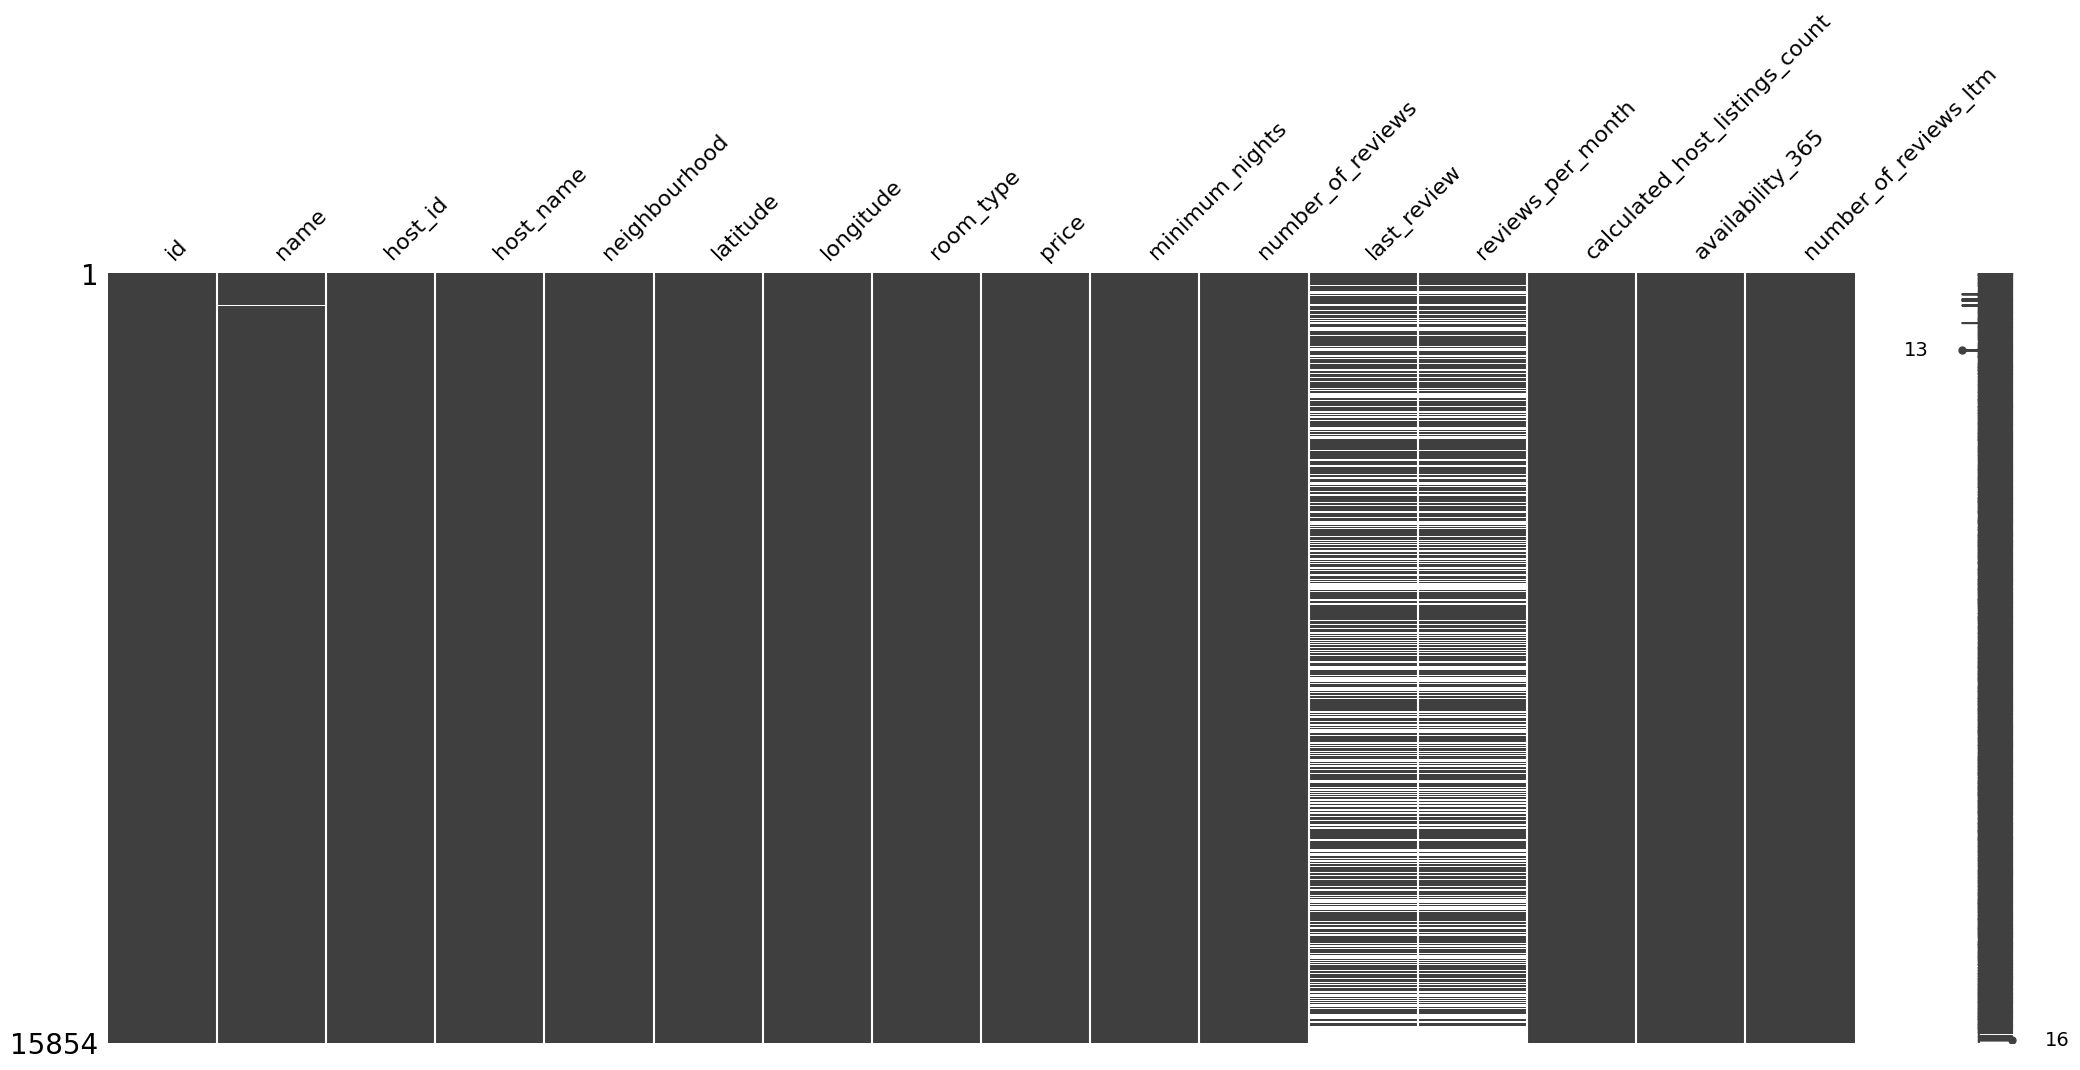

In [11]:
import missingno
missingno.matrix(df)

<Axes: >

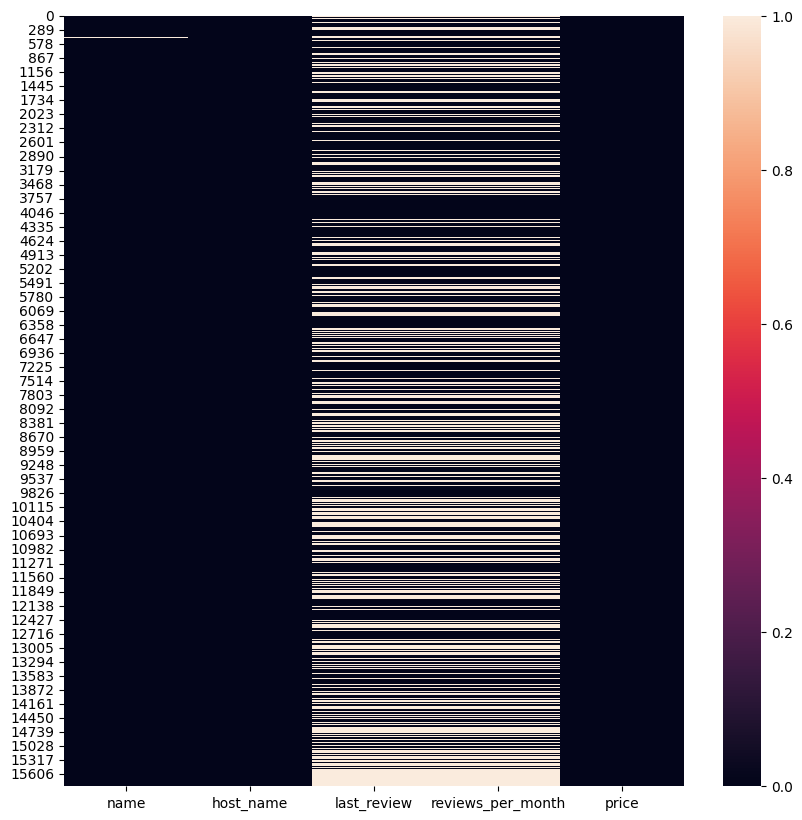

In [12]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month','price']].isna())

Secara garis besar :  
* *missing value* di kolom `name` dan `host_name` memiliki proporsi cukup kecil (<10%), sedangkan kolom `last_review` dan `reviews_per_month` memiliki proporsi yang cukup tinggi (>10%), dengan missing value di kolom `last_review`, dan `reviews_per_month` adalah sama yaitu mencapai 36.52%.
* *missing value* di kolom `last_review`, dan `reviews_per_month` memiliki sebaran yang terlihat berkaitan, jika data di `last_review` kosong, maka kemungkinan besar data di `reviews_per_month` juga kosong.
* Kolom `last_review`, dan `reviews_per_month` memiliki missing value yang sama. Dimana kolom `last_review` mewakili sebagai tanggal terakhir customer memberikan review di listing tersebut dan kolom `reviews_per_month` adalah rata - rata jumlah review yang diperoleh dalam waktu sebulan. Jadi jika keduanya kosong adalah tidak ada pengguna yang memberikan review terhadap listing tersebut. Jadi jika tidak ada pengguna yang memberikan review terhadap listing maka tidak ada tanggal terakhir yang diberikan.

Ada 2 cara untuk menangani *missing value* :
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup tinggi (sampai 36.5%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh. 

### a.Menangani Missing Value pada kolom `name`

In [13]:
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


- Terdapat 8 data kosong pada kolom `name`
- Terdapat 1 host name yang memiliki `calculated_host_listings_count` berjumlah 3. Kita dapat berasumsi bahwa host name ini memiliki listings dengan `name` yang sama.
- Pada 7 missing value lainnya tidak terdapat persamaan yang dapat digunakan untuk mengisi pada data kosong tersebut. 

In [14]:
df[df['host_name']=='Pakaphol']
# Setelah dilakukan pengecekan ternyata kita dapat mengisi kolom name yang kosong berdasarkan host name dari listing yang sama

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [15]:
# mengisi kolom name yang kosong berdasarkan host_name yang sama
df['name'].iloc[2075] = 'Errday Guest House'
df[df['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Tedapat 7 kolom `name` lain yang berisi NaN. Kita dapat berasumsi bahwa ke 7 data kosong tersebut tidak terisi saat melakukan penginputan data atau ke 7 listing tersebut sudah tidak beroperasi lagi karena pada ke 7 data kosong tersebut, jumlah dari masing-masing data kosong pada kolom `availability_365` berjumlah **365**. Bahkan dari ke 7 listing tersebut hanya 1 listing yang pernah mendapatkan review. Oleh sebab itu, tindakan yang diambil adalah menghapus listing tersebut karena tidak ada cara yang dirasa sesuai untuk mengisi data tersebut.

In [16]:
# Menghapus baris dari ke 7 data missing value
df = df.dropna(subset=['name'])
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### b. Menangani missing value pada kolom `host_name`

In [17]:
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


Kita dapat berasumsi bahwa listing tersebut sudah tidak beroperasi, karena pada kolom `availability_365` berjumlah **365** yang dapat diartikan tidak ada  yang menyewa listing tersebut dan terakhir mendapatkan review pada tahun 2017. Maka, penanganan yang dilakukan adalah menghapus listing tersebut.

In [18]:
# Menghapus nilai kosong pada kolom 'host_name'
df = df.dropna(subset=['host_name'])
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### c. Menangani missing value pada kolom `last_review`


In [19]:
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


Terdapat **5784** data kosong pada kolom `last_review`. Data kosong tersebut kosong bisa diasumsikan karena listing tersebut belum pernah mendapatkan review, sehingga kolom `last_review` yang berisi tanggal review terakhir juga kosong. Kita juga tidak bisa menghapus 5784 baris atau sebesar 36% data dalam dataset ini, karena itu akan berpengaruh pada hasil analisis secara keseluruhan.

Tipe Data dari kolom `last_review` dapat diganti formatnya menjadi date tetapi karena kita tidak butuh variable tipe date tersebut, maka kita akan mengisi menjadi **Not Reviewed**. String tidak bisa di input ketika tipe data tersebut date.

In [20]:
# Mengisi missing value dari kolom last review dengan Not Reviewed
df['last_review'] = df['last_review'].fillna('Not Reviewed')
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### d. Menangani missing value pada kolom `reviews_per_month`

In [21]:
df[df['reviews_per_month'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,Not Reviewed,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,Not Reviewed,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,Not Reviewed,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,Not Reviewed,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,Not Reviewed,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,Not Reviewed,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,Not Reviewed,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,Not Reviewed,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,Not Reviewed,NaN,14,365,0


Terdapat **5784** missing value pada kolom `reviews_per_month`. Data kosong tersebut kosong bisa diasumsikan karena listing tersebut belum pernah mendapatkan review, sehingga kolom `reviews_per_month` yang berisi rata-rata review perbulan terakhir kosong. Maka, dari informasi tersebut kita dapat mengisi data kosong tersebut dengan nilai **0**.

In [22]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## D. Outliers

<Axes: xlabel='price', ylabel='room_type'>

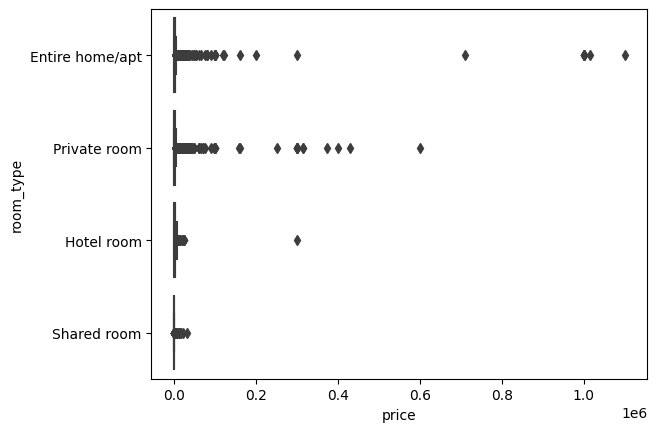

In [23]:
sns.boxplot(data = df,x='price', y='room_type')

Terdapat outliers di room type entire home/apt dengan harga yang cukup tinggi namun sudah ada review. Dapat diasumsikan bahwa host bebas memberikan harga pada unit mereka dengan harga tinggi dengan bukti listing mereka juga sudah pernah ada yang memesan. Jadi tidak perlu ada tindakan yang diambil karena ini adalah valid.

<Axes: xlabel='reviews_per_month', ylabel='room_type'>

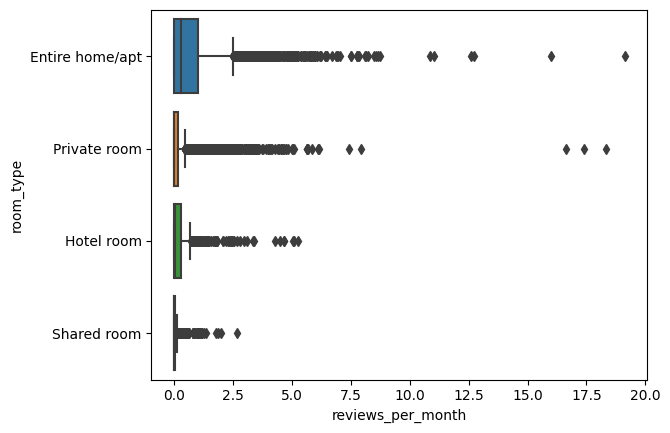

In [24]:
sns.boxplot(data = df,x='reviews_per_month', y='room_type')

Terdapat outliers di room type `entire home/apt` dan `private room` dengan reviews per month cukup tinggi. Dapat diasumsikan user berhak memberi reviews yang tinggi selama masih sesuai dengan range reviews yang ditentukan oleh Airbnb. Jadi tidak perlu ada tindakan yang diambil karena ini adalah valid

## E. Data Duplikat

In [25]:
# Jumlah duplikat data pada seluruh kolom
df.duplicated().sum()

0

In [26]:
# Jumlah duplikat pada data set selain kolom id
df.drop(columns=['id']).duplicated().sum()

7

Terdapat 7 data duplikat pada dataset selain kolom `id`.

### Menangani Data Duplikat

In [27]:
df[df.drop(columns=['id']).duplicated(keep=False)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5890,28831409,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,Not Reviewed,0.0,9,361,0
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,Not Reviewed,0.0,9,361,0
8789,37953702,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,Not Reviewed,0.0,4,180,0
8790,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,Not Reviewed,0.0,4,180,0
15183,765632824291529126,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,Not Reviewed,0.0,44,340,0
15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,Not Reviewed,0.0,44,340,0
15190,765716244664642439,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,Not Reviewed,0.0,40,340,0
15191,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,Not Reviewed,0.0,40,340,0
15549,781507744450884041,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,Not Reviewed,0.0,33,360,0
15550,781514912980696908,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,Not Reviewed,0.0,33,360,0


Terdapat duplikat data apabila kita tidak mengikutsertakan kolom `id` dalam pencarian data duplikat. 
Dari Data duplikat tersebut kita mengetahui bahwa hampir setiap kolomnya berisi data yang sama kecuali pada kolom `id`. 
Maka, kita akan menghapus kolom duplikat tersebut.

In [28]:
df = df.drop([5976, 8790, 15186, 15191, 15550, 15615, 15831], axis=0)
df[df.drop(columns=['id']).duplicated(keep=False)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


Sudah tidak terdapat data duplikat.

### e. Reset Index
Setelah melakukan tahapan menangani missing value, kita disarankan untuk mengatur ulang index yang ada.

In [29]:
df = df.reset_index(drop=True)
display(df.tail() , df.shape)

# ini setelah duplikat sajaa

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15834,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,Not Reviewed,0.0,1,362,0
15835,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,Not Reviewed,0.0,14,365,0
15836,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,Not Reviewed,0.0,14,365,0
15837,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,Not Reviewed,0.0,14,365,0
15838,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,Not Reviewed,0.0,14,365,0


(15839, 16)

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [30]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15839, 16)


,dataFeatures,dataType,null,unique,uniqueSample
0,id,int64,0,15839,"[43435049, 11398803]"
1,name,object,0,14793,"[Chill Out With Love :1BR WIFI/JOOD Fair/Pool,..."
2,host_id,int64,0,6651,"[467362075, 4895420]"
3,host_name,object,0,5306,"[Jason, ปรารถนา]"
4,neighbourhood,object,0,50,"[Huai Khwang, Ratchathewi]"
5,latitude,float64,0,9602,"[13.7406029, 13.65441]"
6,longitude,float64,0,10222,"[100.564, 100.56426]"
7,room_type,object,0,4,"[Hotel room, Shared room]"
8,price,int64,0,3040,"[968, 1088]"
9,minimum_nights,int64,0,86,"[300, 18]"


Sebelum dibersihkan, kita memiliki **15,854** baris data dan 17 kolom, sekarang kita memiliki **15,832** baris data dan 16 kolom. Sebanyak 22 baris data yang kosong telah dihapus, dan beberapa data kosong diisi dengan data yang dirasa relevan.

# **4. Data Analysis**
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Bagaimana karakteristik listing airbnb di bangkok yang banyak disewa/dipilih oleh user?**.  



## A. Korelasi Antar Kolom

Pada tahap ini akan menampilkan visualisasi heatmap pada matriks korelasi 2 dimensi antara dua variable atau lebih, menggunakan *Correlation Heatmap*. Data yang akan divisualisasikan adalah seluruh kolom numerikal pada `df`.

In [31]:
# Membuat variabel numerik yang berisi dataframe dengan tipe numerik saja
numerik = df.select_dtypes(include= 'number')
numerik

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,120437,13.759830,100.541340,1905,3,65,0.50,2,353,0
1,27979,120541,13.668180,100.616740,1316,1,0,0.00,2,358,0
2,28745,123784,13.752320,100.624020,800,60,0,0.00,1,365,0
3,35780,153730,13.788230,100.572560,1286,7,2,0.03,1,323,1
4,941865,610315,13.768720,100.633380,1905,1,0,0.00,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...
15834,790465040741092826,94899359,13.715132,100.653458,2298,28,0,0.00,1,362,0
15835,790474503157243541,491526222,13.753052,100.538738,1429,1,0,0.00,14,365,0
15836,790475335086864240,491526222,13.753169,100.538700,1214,1,0,0.00,14,365,0
15837,790475546213717328,491526222,13.754789,100.538757,1214,1,0,0.00,14,365,0


Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

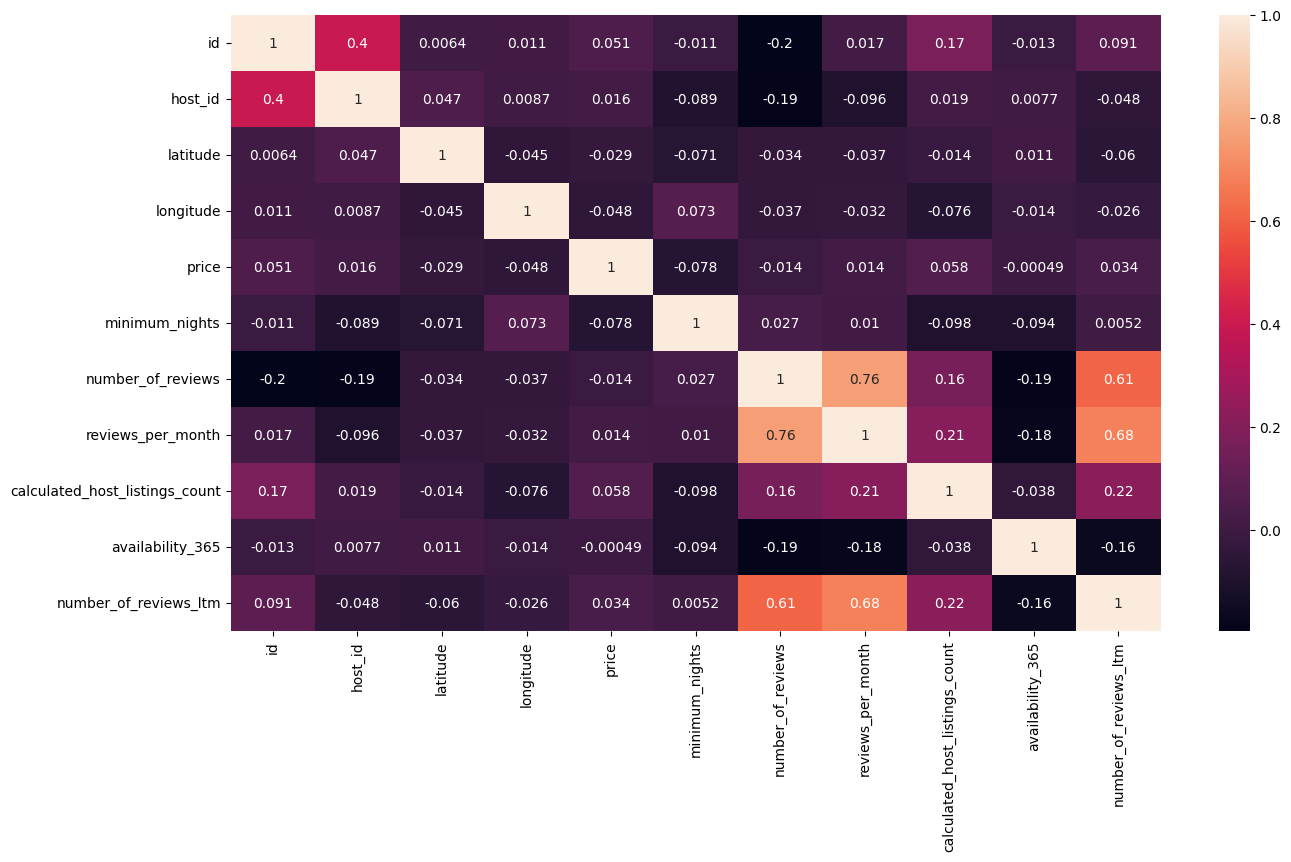

In [32]:
# Membuat Korelasi antar baris data menggunakan Heatmap Correlation
corr = numerik.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
numerik.columns

- Terdapat beberapa Korelasi yang masuk dalam kategori kuat positif (0.7 - 1). Maka, semakin tinggi nilai suatu data maka semakin tinggi kolom lainnya.
- kolom `reviews_per_month` berhubungan dengan `number_of_reviews`
- kolom `reviews_per_month` berhubungan dengan `number_of_reviews_ltm`
- kolom `number_of_reviews_ltm` berhubungan dengan `number_of_reviews`

## B. Analisa berdasarkan `room_type`

#### 1. Analisa kolom `room_type` berdasarkan Jumlah Keseluruhan Listing

In [33]:
# Menghitung Jumlah Ruangan Berdasarkan room_type nya
df_RT = df['room_type'].value_counts()
df_RT = pd.DataFrame(df_RT).reset_index()

# Membuat persentase setiap room_type
df_RT['persentase'] = df_RT['count'] / df_RT['count'].sum() * 100
df_RT

,room_type,count,persentase
0,Entire home/apt,8907,56.234611
1,Private room,5761,36.372246
2,Hotel room,649,4.097481
3,Shared room,522,3.295663


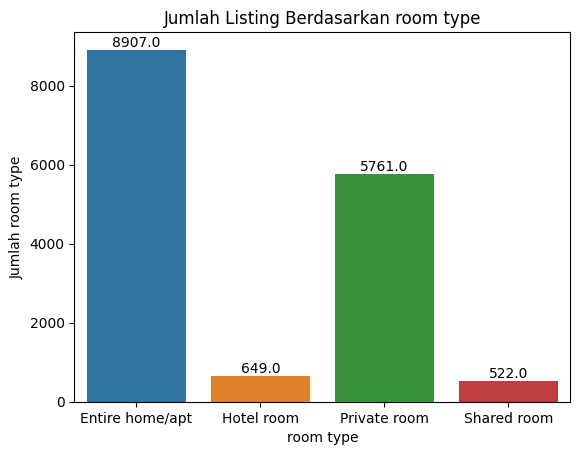

In [34]:
ax = sns.barplot(data=df_RT.sort_values('room_type'), x='room_type', y='count', estimator=sum)
plt.title('Jumlah Listing Berdasarkan room type')

plt.xlabel('room type')
plt.ylabel('Jumlah room type')

container = ax.containers[0]

ax.bar_label(container, [x for x in container.datavalues])

plt.show()

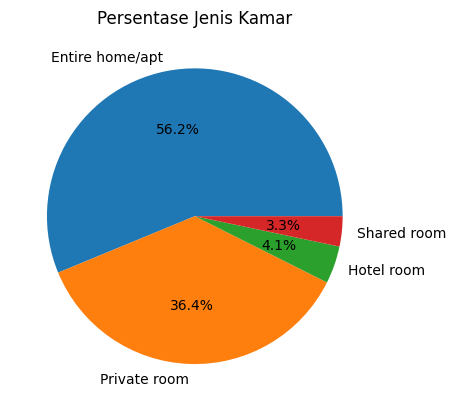

In [35]:
room_type = df['room_type'].value_counts()
room_type_percent = room_type / len(df) * 100

plt.pie(room_type_percent, labels=room_type_percent.index, autopct='%1.1f%%')
plt.title('Persentase Jenis Kamar')
plt.show()

Berdasarkan grafik tersebut Dapat terlihat bahwa distribusi tipe kamar di keseluruhan data :
- Tipe Ruangan yang paling banyak disewakan adalah `Entire home/apt` dengan jumlah **8907** dan persentasenya adalah **56.23 %**
- Tipe Ruangan yang paling banyak disewakan adalah `shared room` dengan jumlah **522** dan persentasenya adalah **3.3 %**
- Ini menunjukan host mempunyai paling banyak listing tipe Rumah dan Apartemen disusul dengan Private room yang disediakan untuk pelanggan

#### 2. Analisa `room_type` Berdasarkan Kolom Price (Harga Rata-rata)

In [36]:
# Menampilkan harga pada listings berdasarkan mean 'price'
df_price = df.groupby('room_type')['price'].mean()
df_price = pd.DataFrame(df_price).reset_index()
df_price = round(df_price,2)
df_price

,room_type,price
0,Entire home/apt,3466.08
1,Hotel room,3028.31
2,Private room,3066.71
3,Shared room,920.85


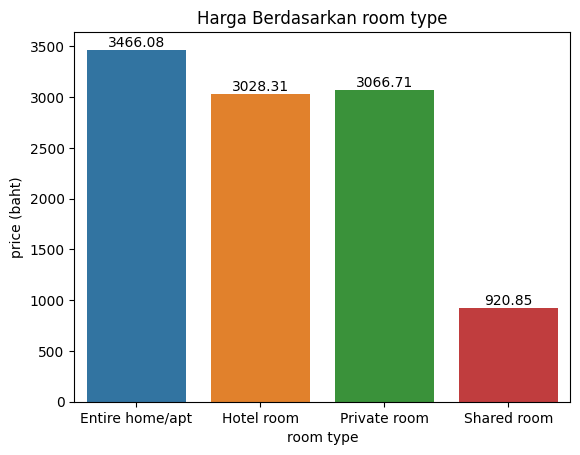

In [37]:

ax = sns.barplot(data=df_price, x='room_type', y='price', estimator=sum)
plt.title('Harga Berdasarkan room type')

plt.xlabel('room type')
plt.ylabel('price (baht)')

container = ax.containers[0]

ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Harga rata-rata dari room type yang paling mahal adalah `Entire home/apt` yaitu sebesar **3466,08 baht** untuk 1 malam
- Harga rata-rata dari room type yang paling murah adalah `Shared room` yaitu sebesar **920,85 baht** untuk 1 malam

#### 3. Analisa `room_type` berdasarkan reviews per month 

In [38]:
# Menampilkan room type pada listings berdasarkan mean (reviews per month)
df_revpm = df.groupby('room_type')['reviews_per_month'].mean()
df_revpm = pd.DataFrame(df_revpm).reset_index()
df_revpm = round(df_revpm,2)
df_revpm

,room_type,reviews_per_month
0,Entire home/apt,0.71
1,Hotel room,0.32
2,Private room,0.28
3,Shared room,0.11


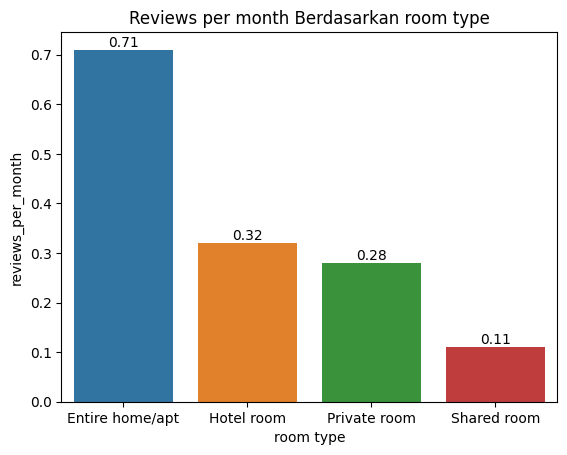

In [39]:
ax = sns.barplot(data=df_revpm, x='room_type', y='reviews_per_month', estimator=sum)
plt.title('Reviews per month Berdasarkan room type')

plt.xlabel('room type')
plt.ylabel('reviews_per_month')

container = ax.containers[0]

ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- reviews_per_month rata-rata dari room type yang paling tinggi adalah `Entire home/apt` yaitu sebesar **0,71**
- reviews_per_month rata-rata dari room type yang paling rendah adalah `Shared room` yaitu sebesar **0,11**

## C. Analisa Berdasarkan `Neighbourhood`

#### 1. Analisa `Neighbourhood` berdasarkan `room_type` dan Jumlah Keseluruhan Listing

In [40]:
# Membuat tabel dengan jumlah listing per'neighbourhood' dan 'room_type'nya
df_neig_rt = df.pivot_table(
    index= ['neighbourhood', 'room_type'],
    values= 'id',
    aggfunc= 'count'
).reset_index()
df_neig_rt['total'] = df_neig_rt.groupby('neighbourhood')['id'].transform('sum')
df_neig_rt['persentase'] = df_neig_rt['id'] / df_neig_rt['total'] * 100
df_neig_rt

,neighbourhood,room_type,id,total,persentase
0,Bang Bon,Entire home/apt,2,5,40.000000
1,Bang Bon,Private room,3,5,60.000000
2,Bang Kapi,Entire home/apt,124,259,47.876448
3,Bang Kapi,Hotel room,1,259,0.386100
4,Bang Kapi,Private room,131,259,50.579151
...,...,...,...,...,...
163,Wang Thong Lang,Shared room,3,100,3.000000
164,Yan na wa,Entire home/apt,120,200,60.000000
165,Yan na wa,Hotel room,8,200,4.000000
166,Yan na wa,Private room,69,200,34.500000


In [41]:
# Membuat tabel yang memberikan informasi jumlah listing berdasarkan neighbourhood dan persentasenya
df_neig_rt_ = pd.DataFrame(df_neig_rt.groupby('neighbourhood')['id'].sum().reset_index())
df_neig_rt_['persentase'] = df_neig_rt_['id'] / df_neig_rt_['id'].sum() * 100
df_neig_rt_

,neighbourhood,id,persentase
0,Bang Bon,5,0.031568
1,Bang Kapi,259,1.635204
2,Bang Khae,92,0.580845
3,Bang Khen,116,0.732369
4,Bang Kho laen,140,0.883894
5,Bang Khun thain,21,0.132584
6,Bang Na,457,2.885283
7,Bang Phlat,216,1.363722
8,Bang Rak,827,5.221289
9,Bang Sue,250,1.578382


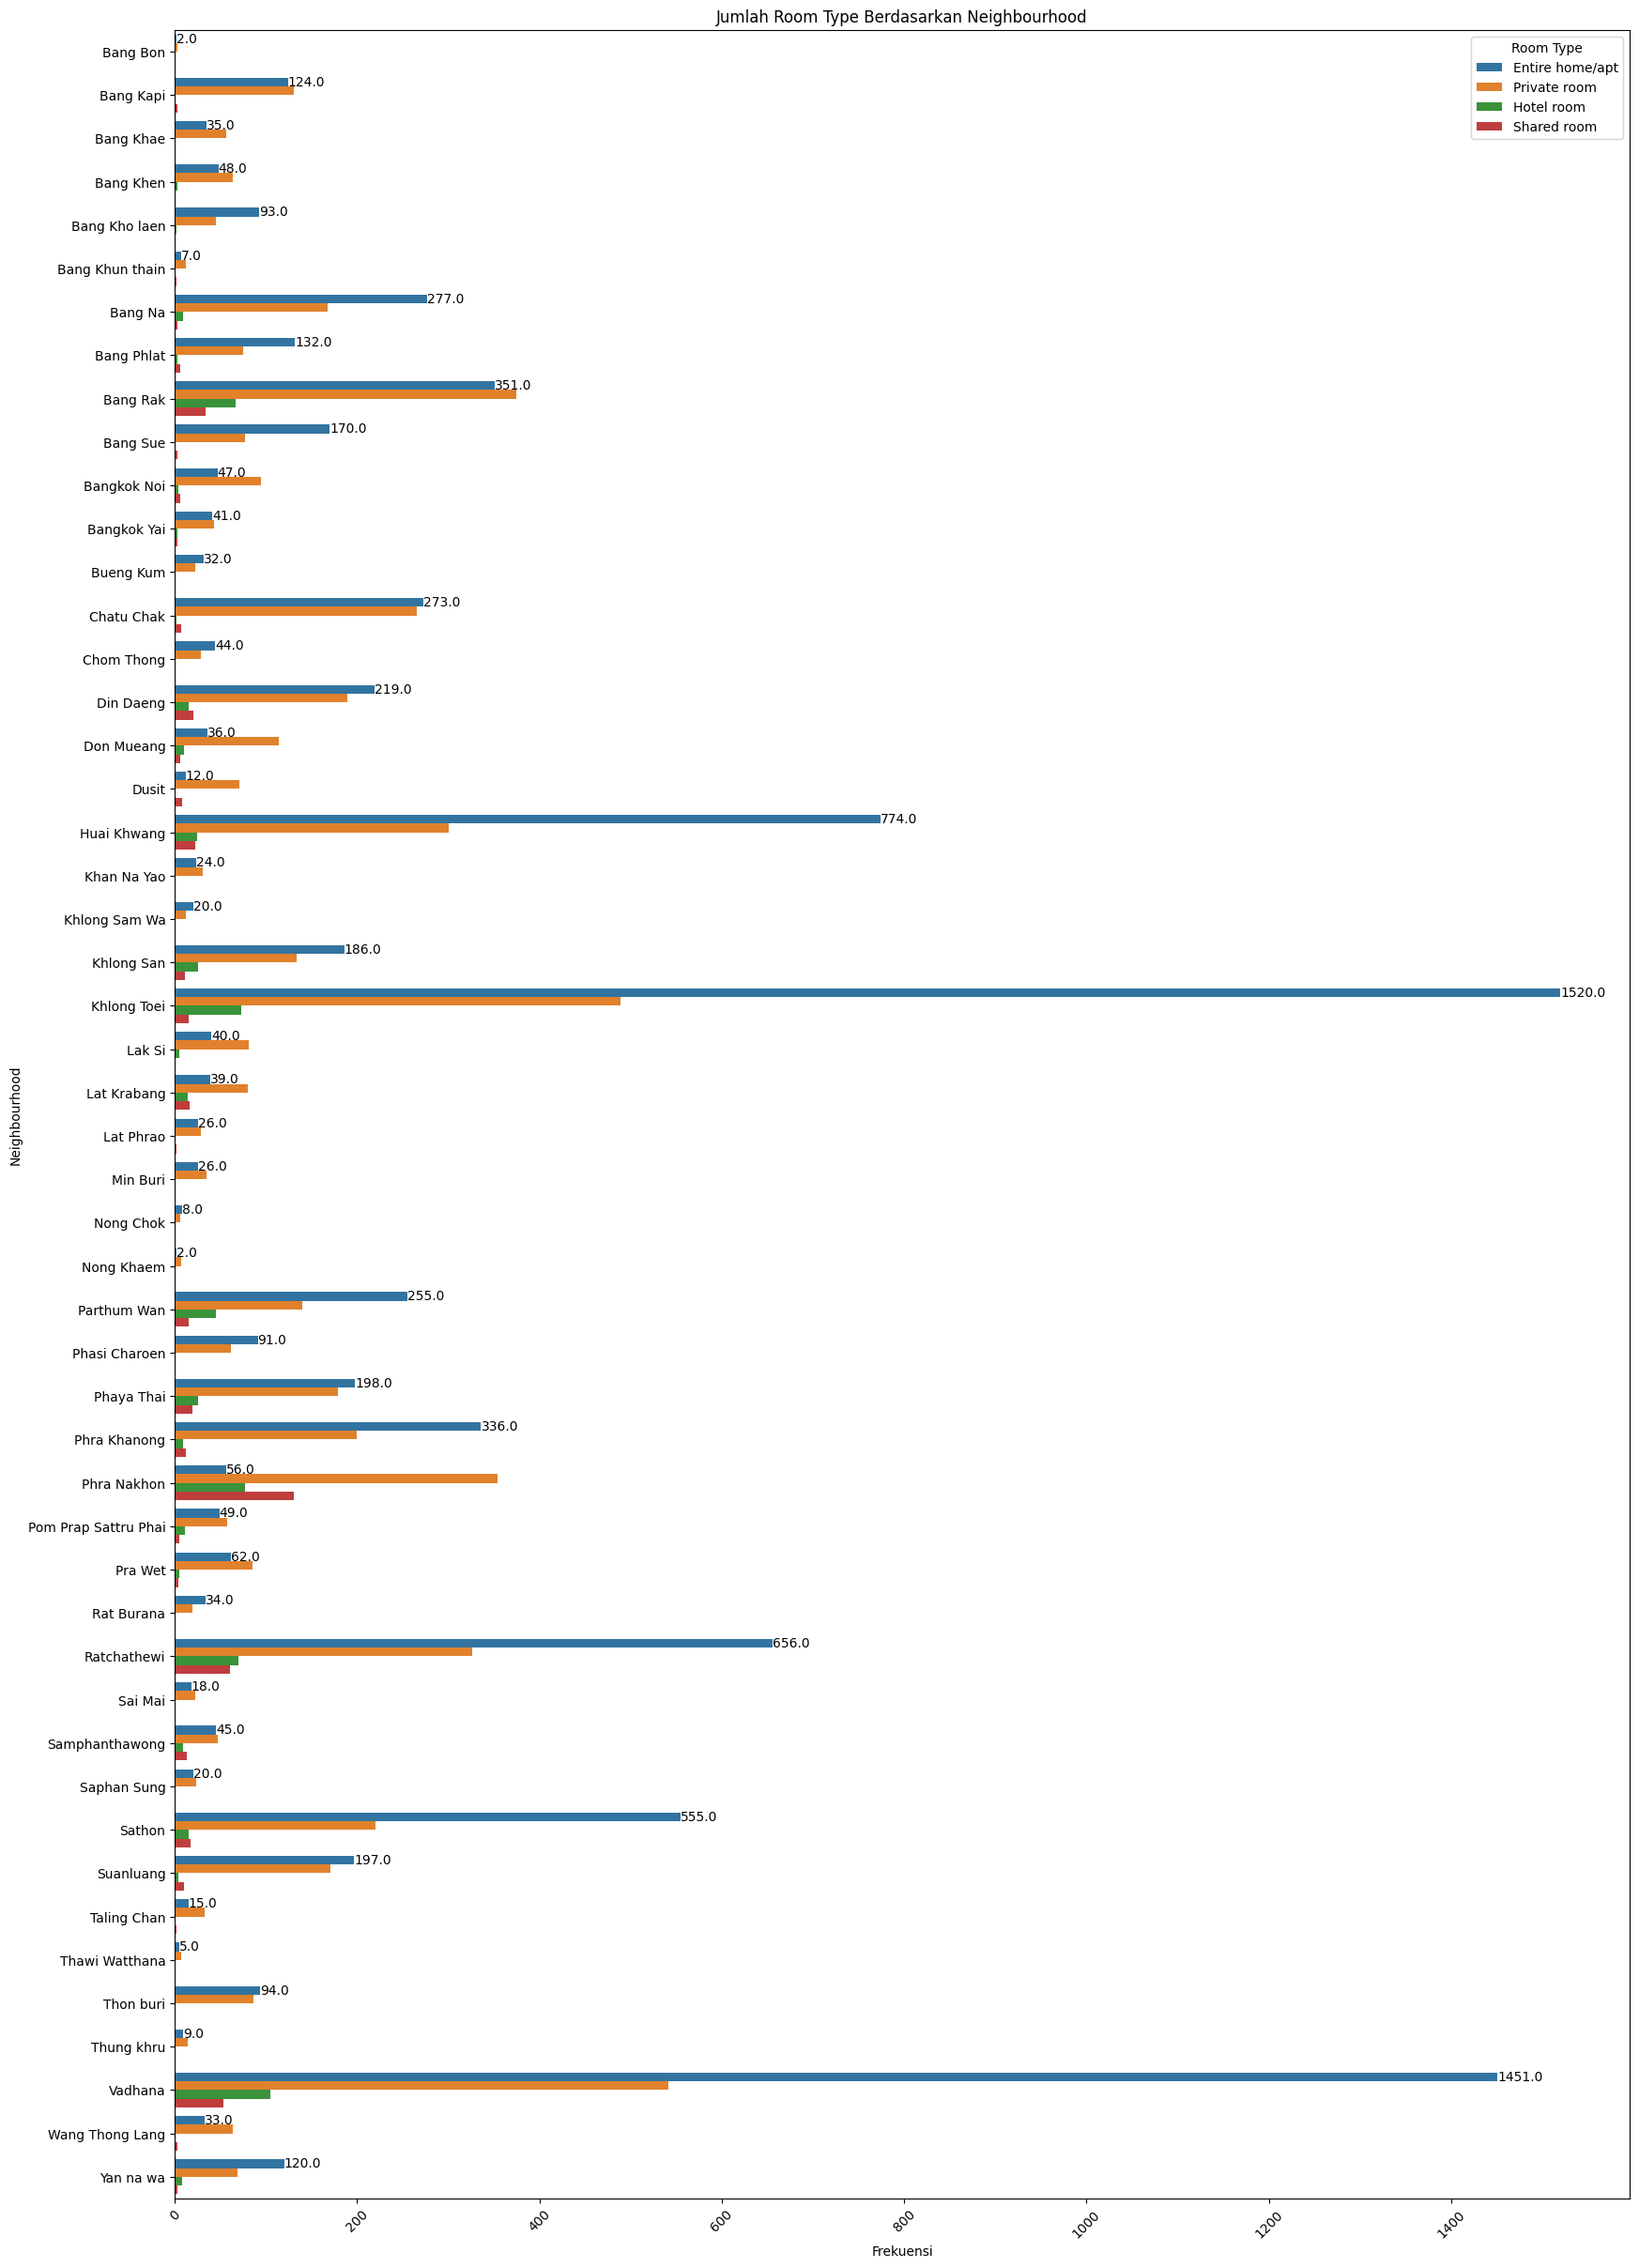

In [42]:
plt.figure(figsize=(20,30))
ax = sns.barplot(data=df.sort_values(['neighbourhood','room_type']), x='id', y='neighbourhood',hue= 'room_type', estimator=len)
plt.title('Jumlah Room Type Berdasarkan Neighbourhood')

plt.xlabel('Frekuensi')
plt.xticks(rotation=45)
plt.ylabel('Neighbourhood')
plt.legend(title= 'Room Type')
container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

<!-- Berdasarkan grafik tersebut :
- Khlong Toei adalah neighbourhood dengan jumlah listing terbanyak yaitu sebanyak **1520** dengan persentase **13,57%**
- Terdapat beberapa neighbourhood dengan jumlah listing terrendah namun tidak termasuk 0 yaitu sebanyak **1** listings -->

Berdasarkan grafik tersebut :
- Terdapat 2 wilayah terbanyak, yaitu `Khlong Toei` dan `Vadhana` jumlah tipe ruangan yang paling banyak adalah tipe `Entire home/apt` dengan jumlah masing-masing **1520** dan **1451**

#### 2. Analisa `Neighbourhood` berdasarkan `price`

In [44]:
# Membuat tabel neighbourhood dengan mean harganya
df_neig_price = df.pivot_table(
    index= ['neighbourhood'],
    values= 'price',
    aggfunc= 'mean'
).reset_index().sort_values('neighbourhood')
df_neig_price = round(df_neig_price,2)
df_neig_price



,neighbourhood,price
0,Bang Bon,1504.40
1,Bang Kapi,3088.53
2,Bang Khae,1849.74
3,Bang Khen,2194.69
4,Bang Kho laen,2408.11
5,Bang Khun thain,3404.71
6,Bang Na,2059.20
7,Bang Phlat,6280.90
8,Bang Rak,3056.34
9,Bang Sue,1793.50


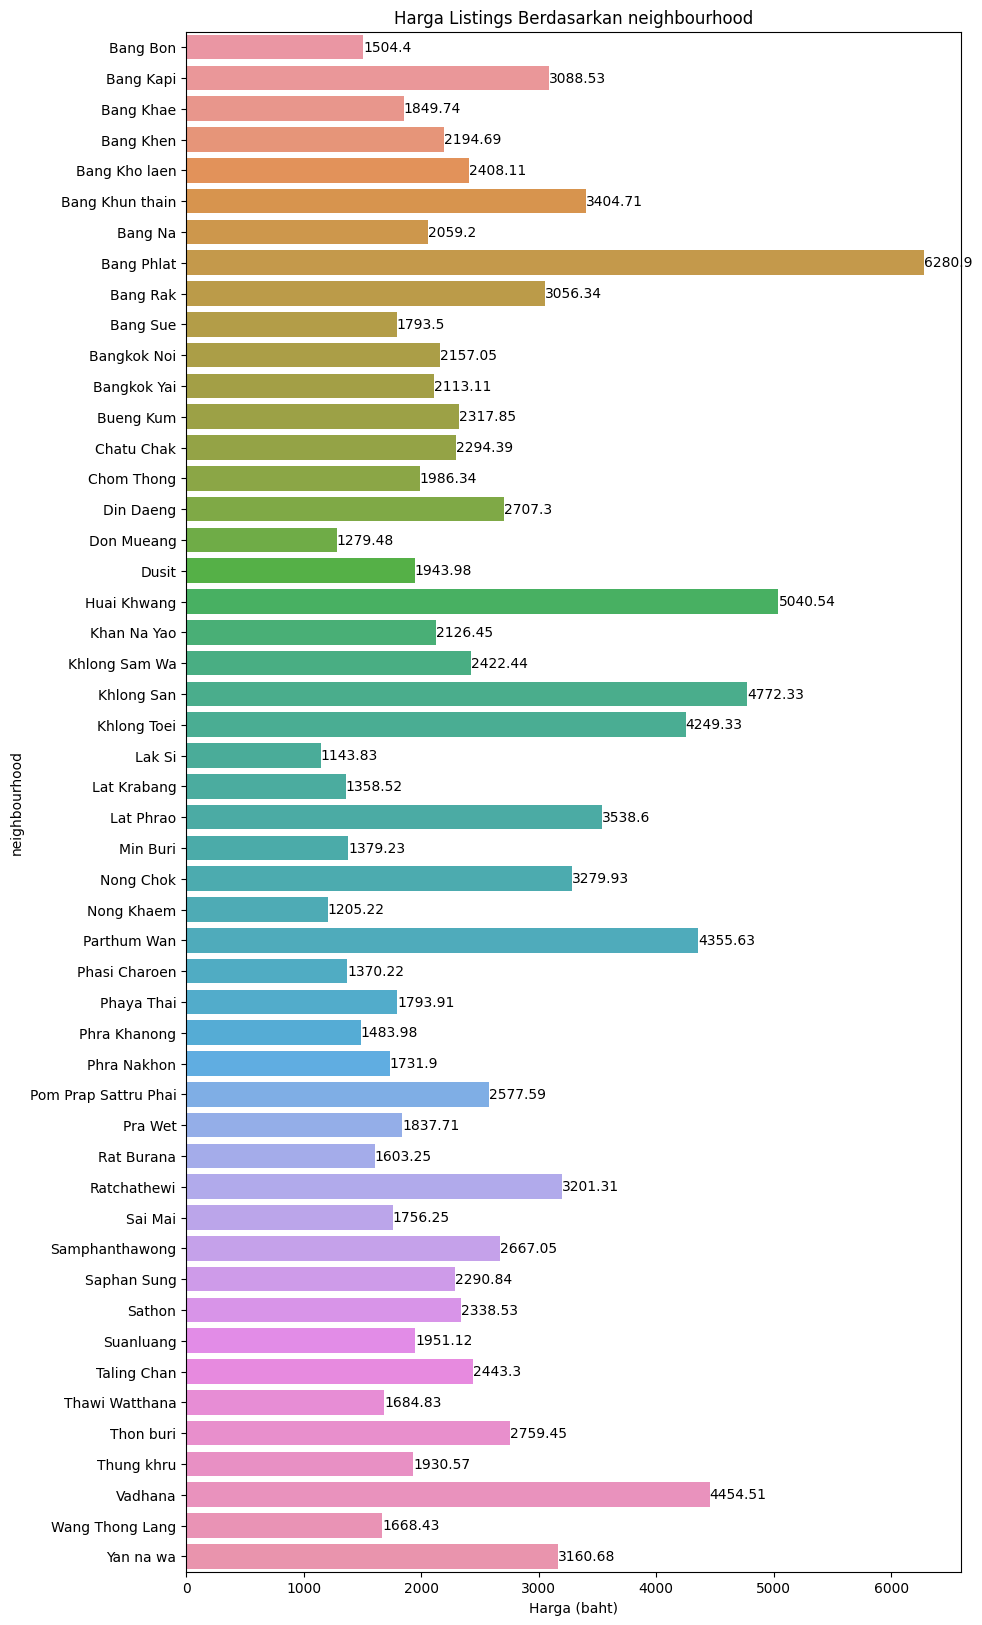

In [45]:
plt.figure(figsize=(10,20))
ax = sns.barplot(data=df_neig_price.sort_values('neighbourhood'), x='price', y='neighbourhood', estimator=sum)
plt.title('Harga Listings Berdasarkan neighbourhood')

plt.xlabel('Harga (baht)')
plt.ylabel('neighbourhood')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut:
- Harga yang listing yang yang ditetapkan host untuk neighbourhood bangkok berkisar antara **1757** - **11836,5** baht.
- Neighbourhood yang memiliki harga paling tinggi adalah neighbourhood `Yan na wa`, dengan harga rata-rata **11836,5** baht. 

In [46]:
# Membuat tabel neighbourhood berdasarkan room type dan harganya
df_neig_price = df.pivot_table(
    index= ['neighbourhood', 'room_type'],
    values= 'price',
    aggfunc= 'mean'
).reset_index().sort_values('neighbourhood')
df_neig_price

,neighbourhood,room_type,price
0,Bang Bon,Entire home/apt,1600.000000
1,Bang Bon,Private room,1440.666667
2,Bang Kapi,Entire home/apt,1586.911290
3,Bang Kapi,Hotel room,600.000000
4,Bang Kapi,Private room,4582.343511
...,...,...,...
161,Wang Thong Lang,Entire home/apt,1812.575758
165,Yan na wa,Hotel room,7183.125000
166,Yan na wa,Private room,2211.318841
164,Yan na wa,Entire home/apt,3491.175000


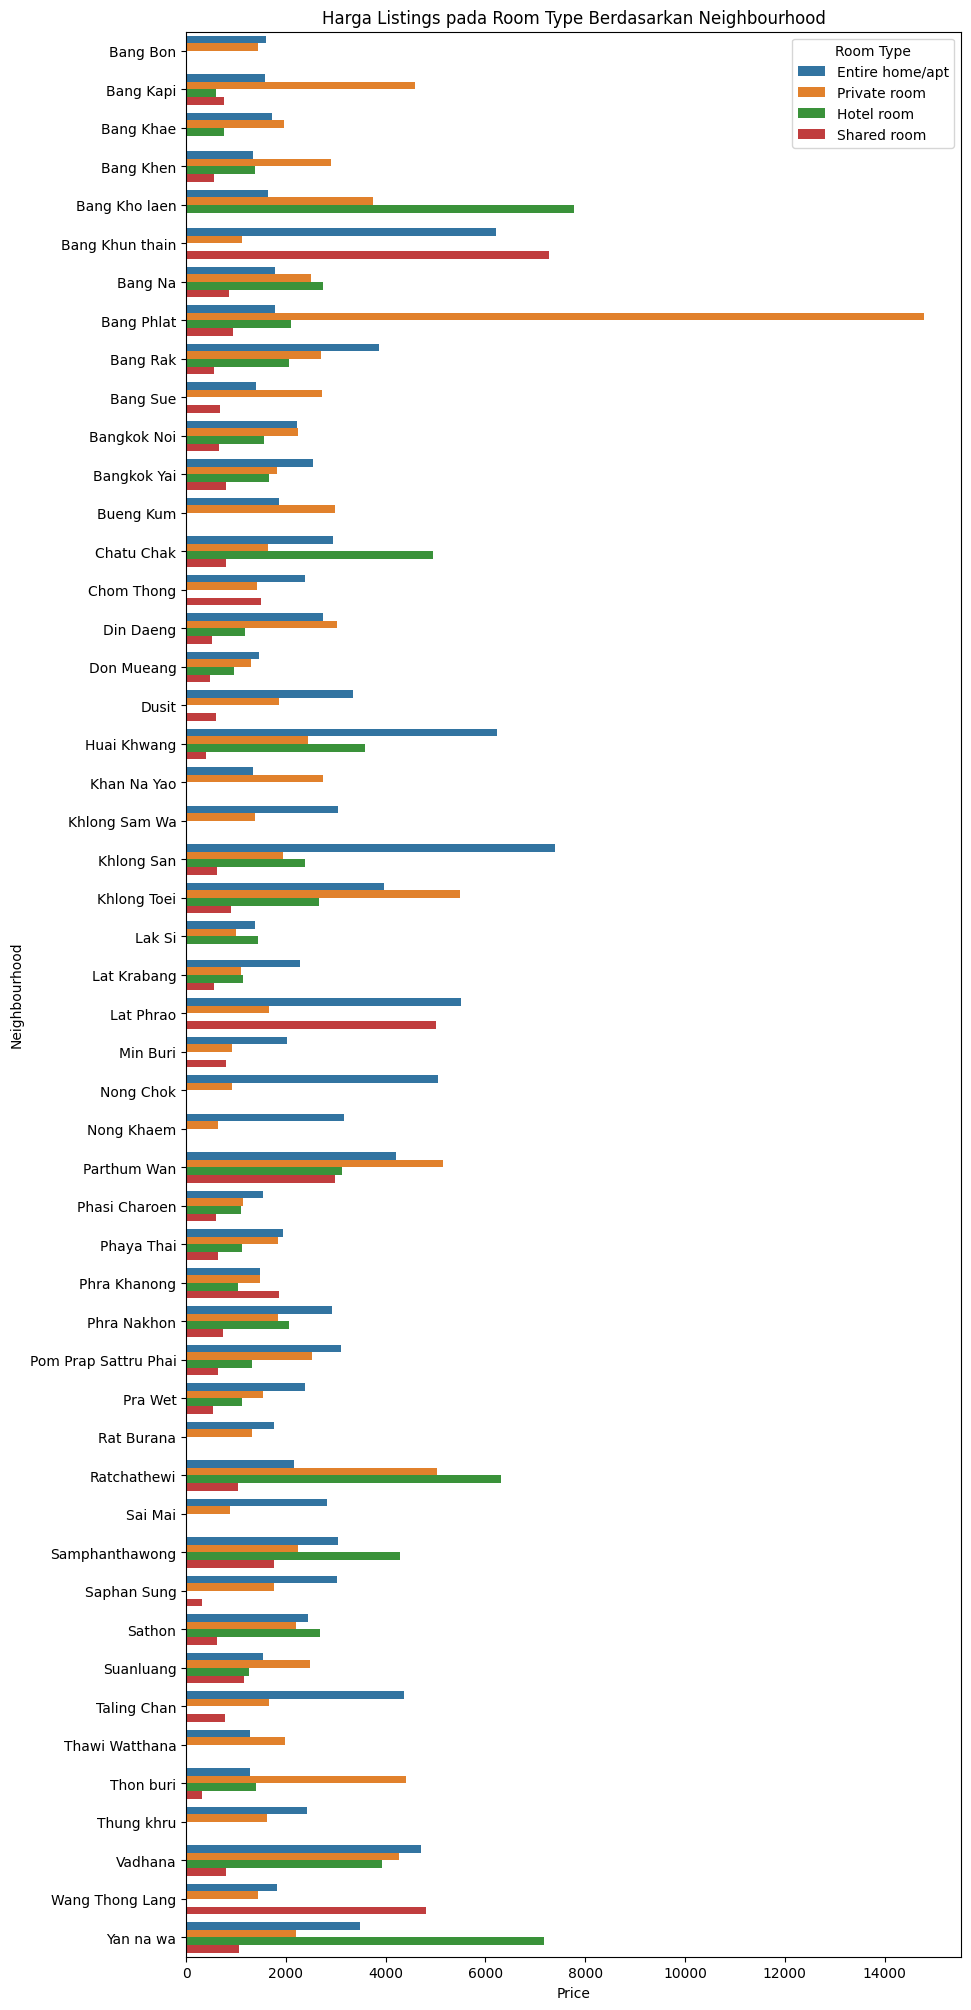

In [47]:
plt.figure(figsize=(10,25))
ax = sns.barplot(data=df_neig_price.sort_values(['neighbourhood','room_type']), x='price', y='neighbourhood',hue='room_type', estimator=sum)
plt.title('Harga Listings pada Room Type Berdasarkan Neighbourhood')

plt.xlabel('Price')
plt.ylabel('Neighbourhood')
plt.legend(title= 'Room Type')

plt.show()

Berdasarkan grafik tersebut:
- Tipe `room_type` `shared room` merupakan tipe ruangan yang menempati harga terendah pada keseluruhan neighbourhood.
- Tipe `room_type` `private room` merupakan tipe ruangan yang menempati harga tetinggi pada keseluruhan neighbourhood.

#### 3. Analisa `Neighbourhood` berdasarkan `reviews per month`

In [48]:
# Membuat tabel neighbourhood dengan mean reviews per month
df_neig_revpm = df.pivot_table(
    index= ['neighbourhood'],
    values= 'reviews_per_month',
    aggfunc= 'mean'
).reset_index().sort_values('neighbourhood')
df_neig_revpm = round(df_neig_revpm,3)
df_neig_revpm

,neighbourhood,reviews_per_month
0,Bang Bon,0.006
1,Bang Kapi,0.217
2,Bang Khae,0.096
3,Bang Khen,0.213
4,Bang Kho laen,0.366
5,Bang Khun thain,0.127
6,Bang Na,0.343
7,Bang Phlat,0.274
8,Bang Rak,0.557
9,Bang Sue,0.446


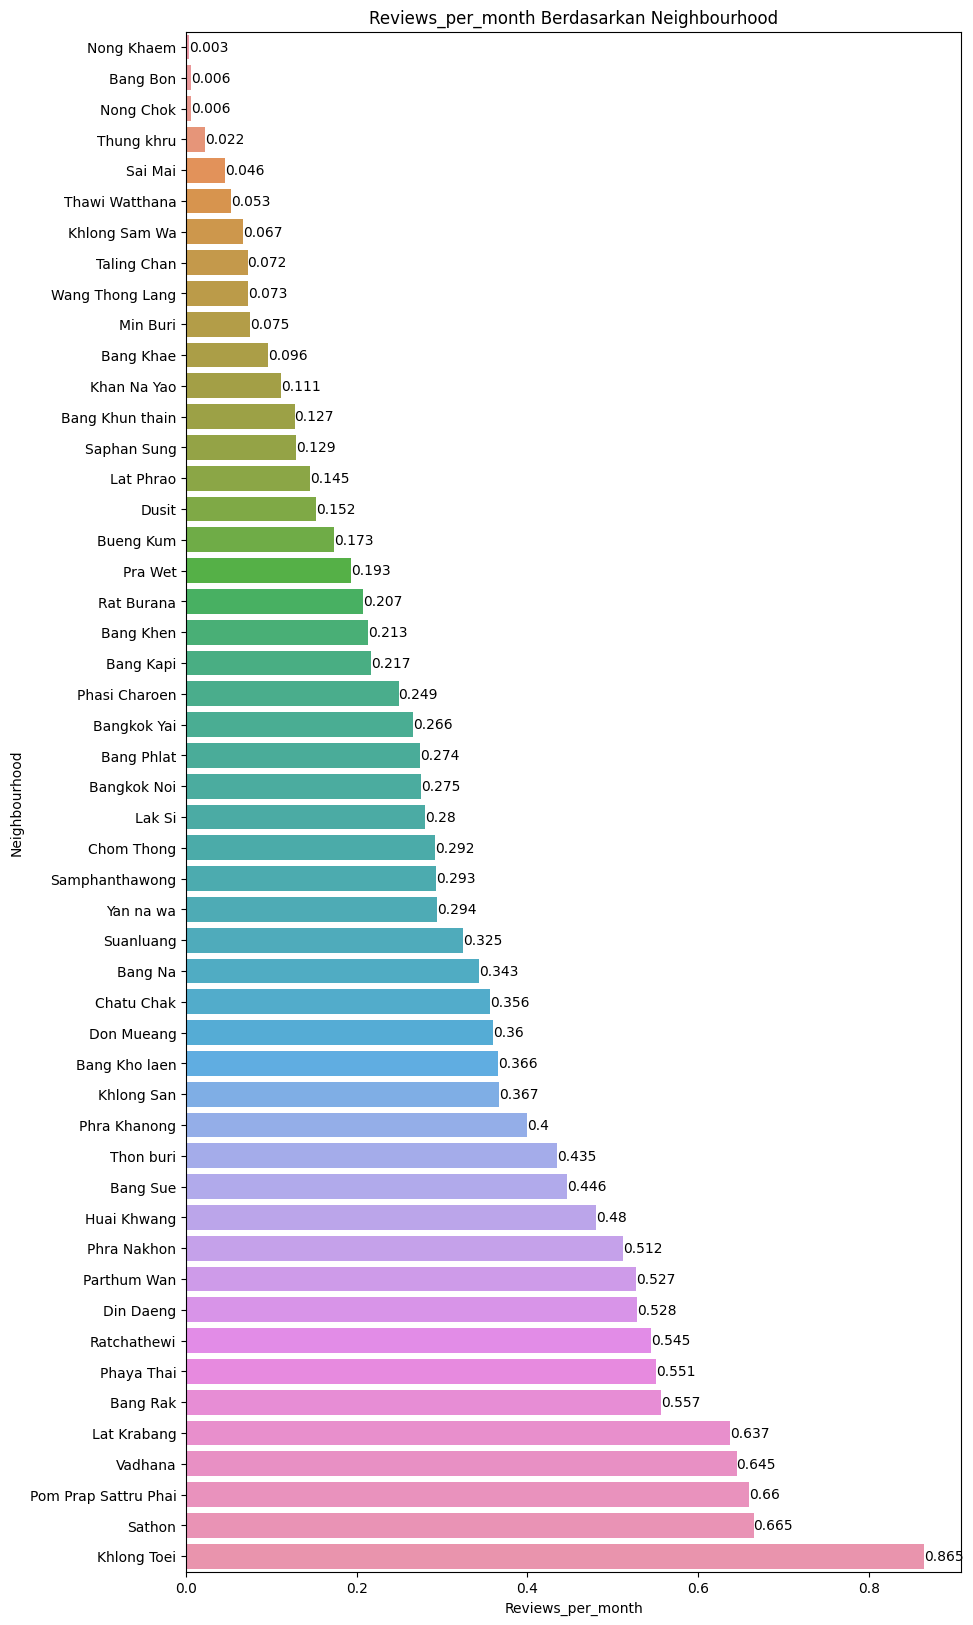

In [49]:
plt.figure(figsize=(10,20))
ax = sns.barplot(data=df_neig_revpm.sort_values('reviews_per_month'), x='reviews_per_month', y='neighbourhood', estimator=sum)
plt.title('Reviews_per_month Berdasarkan Neighbourhood')

plt.xlabel('Reviews_per_month')
plt.ylabel('Neighbourhood')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut:
- Reviews per month pada listing untuk neighbourhood seluruh bangkok berkisar antara **0,003** - **0,865**.
- neighbourhood yang memiliki Reviews per month tertinggi adalah neighbourhood `Khlong Toei`, dengan nilai **0,865**.

In [50]:
# Membuat tabel neighbourhood berdasarkan tipe ruangan dan harganya
df_neig_revpm = df.pivot_table(
    index= ['neighbourhood', 'room_type'],
    values= 'reviews_per_month',
    aggfunc= 'mean'
).reset_index().sort_values('neighbourhood')
df_neig_revpm

,neighbourhood,room_type,reviews_per_month
0,Bang Bon,Entire home/apt,0.015000
1,Bang Bon,Private room,0.000000
2,Bang Kapi,Entire home/apt,0.308952
3,Bang Kapi,Hotel room,0.570000
4,Bang Kapi,Private room,0.132824
...,...,...,...
161,Wang Thong Lang,Entire home/apt,0.089394
165,Yan na wa,Hotel room,0.221250
166,Yan na wa,Private room,0.326232
164,Yan na wa,Entire home/apt,0.287333


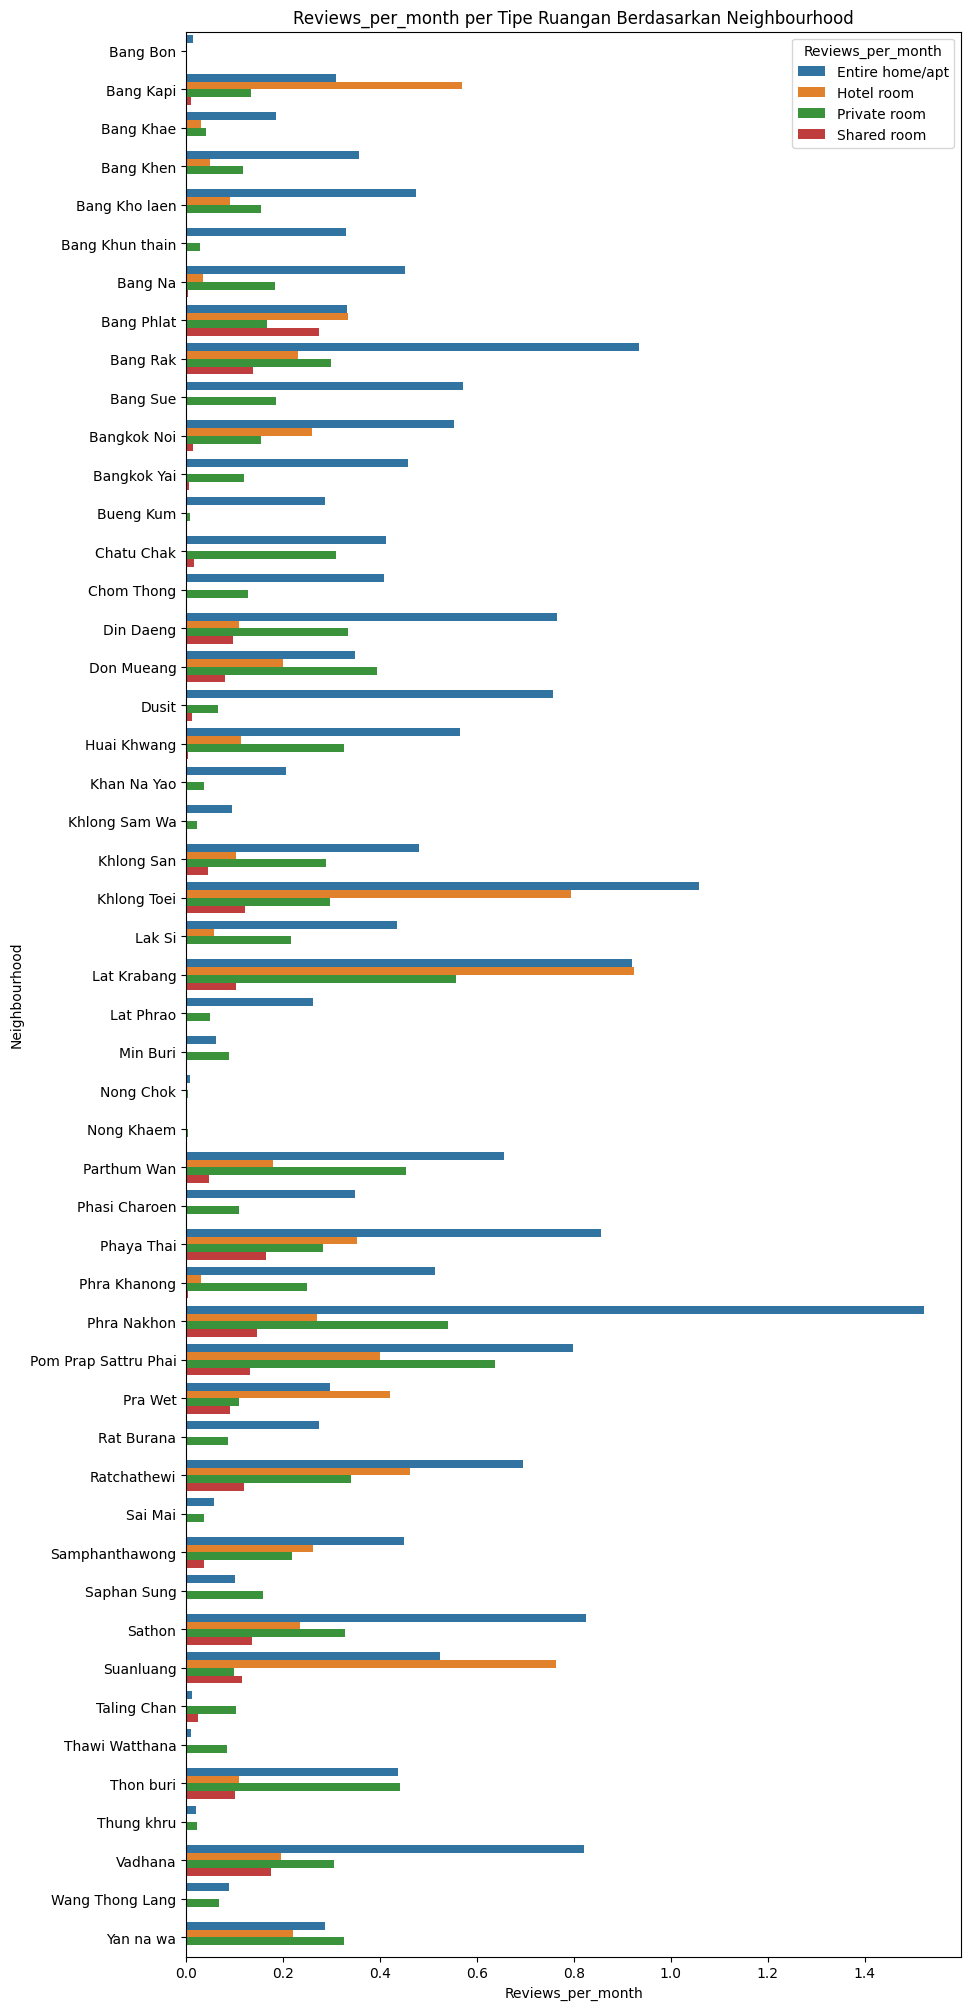

In [51]:
plt.figure(figsize=(10,25))
ax = sns.barplot(data=df_neig_revpm.sort_values(['room_type','neighbourhood']), x='reviews_per_month', y='neighbourhood',hue='room_type', estimator=sum)
plt.title('Reviews_per_month per Tipe Ruangan Berdasarkan Neighbourhood')

plt.xlabel('Reviews_per_month')
plt.ylabel('Neighbourhood')
plt.legend(title= 'Reviews_per_month')

plt.show()

Berdasarkan grafik tersebut:
- `room_type` dengan tipe `Entire home/apt` merupakan tipe ruangan yang review paling tinggi pada keseluruhan neighbourhood.

# **5. Kesimpulan dan Rekomendasi**

Dari analisis yang telah dilakukan, kita dapat mengetahui karakteristik properti yang berada di Bangkok, Thailand :

Analisa berdasarkan `room type`
- Tipe Ruangan yang paling banyak disewakan adalah `Entire home/apt` dengan jumlah **8907** dan persentasenya adalah **56.23 %**
- Harga rata-rata dari room type yang paling mahal adalah `Entire home/apt` yaitu sebesar **3466,08 baht** untuk 1 malam
- reviews_per_month rata-rata dari room type yang paling tinggi adalah `Entire home/apt` yaitu sebesar **0,71**

Analisa Berdasarkan `Neighbourhood`
- Terdapat 2 wilayah terbanyak, yaitu `Khlong Toei` dan `Vadhana` jumlah tipe ruangan yang paling banyak adalah tipe `Entire home/apt` dengan jumlah masing-masing **1520** dan **1451**
- Neighbourhood yang memiliki harga paling tinggi adalah neighbourhood `Yan na wa`, dengan harga rata-rata **11836,5** baht.
- Tipe `room_type` `private room` merupakan tipe ruangan yang menempati harga tetinggi pada keseluruhan neighbourhood.
- neighbourhood yang memiliki Reviews per month tertinggi adalah neighbourhood `Khlong Toei`, dengan nilai **0,865**.


Wilayah yang memiliki karakteristik listings yang paling banyak digunakan oleh user, menurut data listing Airbnb :
- **Host lebih memilih untuk menawarkan room type entire home/apt disebabkan karena menyewakan tipe tersebut memiliki harga listings yang tinggi dan divalidasi dengan reviews per month yang tinggi juga dapat diartikan bahwa listings tersebut laku.**
- **Khlong Toei merupakan neighbourhood dengan angka listings yang tinggi dengan divalidasi adanya reviews per month yang tinggi juga dapat diartikan bahwa listings di Khlong Toei laku digunakan oleh user.**

## **B. Rekomendasi**
Berdasarkan hasil analisis, maka dapat direkomendasikan sebagai berikut :

- Apabila ingin melakukan perluasan bisnis properti di Bangkok, Thailand :
    - Sebaiknya mempertimbangkan untuk memiliki tipe ruangan bertipe Entire home/apt. Tipe ruangan ini adalah tipe ruangan yang baik apabila penyewa ingin mencari rumah yang jauh dari rumahnya. Dengan seluruh rumah, penyewa dapat memiliki seluruh ruangan yang ada didalamnya.
    - Untuk kisaran harga, sebaiknya mempertimbangkan kisaran harga yang ada pada wilayahnya dan kisaran harga tipe ruangan ini berarti harga yang dipatok tidaklah terlalu atas atau terlalu bawah berdasarkan kisaran harga yang ada.


- Apabila ingin melakukan perluasan bisnis properti dengan fokus hanya pada suatu neighbourhood, disarankan memperluas bisnis pada neighbourhood Khlong Toei:
    - Tipe ruangan yang paling baik pada region ini adalah tipe ruangan Entire home/apt.
    - Pada wilayah ini berdasarkan analisis merupakan wilayah dengan jumlah listing yang mendapat review paling banyak. 
    - Untuk harga pada wilayah ini memiliki kisaran harga yang lebih tinggi dibanding kisaran harga wilayah lainnya yang ada di Bangkok.

- Saran untuk host agar listings nya menarik :
    - Pada masa awal menambahkan listings, disarankan untuk menggunakan harga yang kompetitif atau gunakan harga terendah berdasarkan range harga yang ada di neighbourhood dengan tujuan untuk mendapatkan review.
    - Apabila mendapat review rendah dapat digunakan untuk memperbaiki listings sedangkan review tinggi selanjutnya dapat digunakan untuk menaikkan harga listings secara perlahan hingga mencapai harga ideal.

- Saran untuk perusahaan dalam rangka melakukan analisa pada tahun mendatang :
    -  Menambahkan kolom fasilitas dan ameneties pada dataset agar dapat dilakukan analisa lebih dalam terkait karakteristik properti di airbnb listings bangkok